# **Mielage Prediction - Regression Analysis**


Objective:
To predict efficient mielage using LinearRegression algorithm.

Data Source:
The dataset was taken from the statLib library which is maintained at camegie Mellon university.The dataset was used in the 1983 American Statistical Association Exposition

### Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv")

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

### Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr()
#corelation in each column in data frame

<ipython-input-8-010277cd9980>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [ ]:
#remove missing values
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


### Data visualization

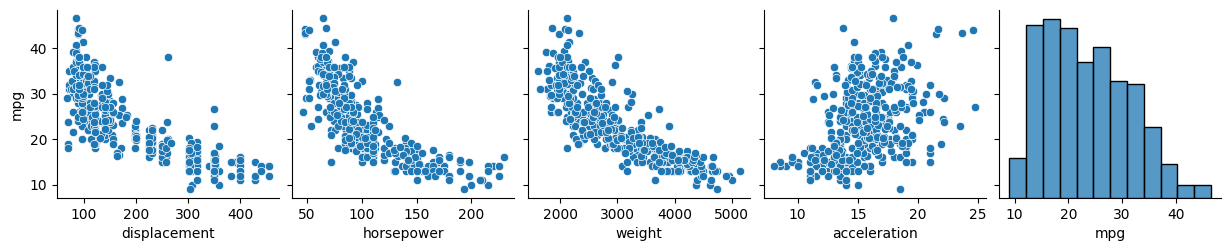

In [ ]:
sns.pairplot(df,x_vars=['displacement', 'horsepower', 'weight',
       'acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

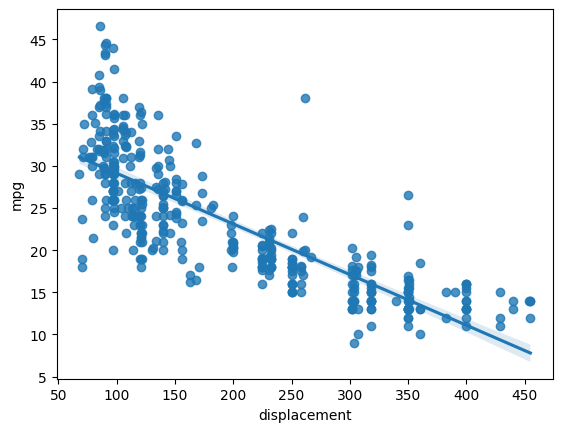

In [ ]:
sns.regplot(x='displacement',y='mpg',data=df)

### Define Target variable y and Feature variable x

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=df['mpg']


In [ ]:
x=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [ ]:
x.shape,y.shape

((392, 4), (392,))

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [ ]:
#Scaling of data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
x=ss.fit_transform(x)

In [ ]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


### Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((294, 4), (98, 4), (294,), (98,))

### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

23.464404729340036

In [ ]:
lr.coef_

array([-0.82134735, -2.00007128, -4.12715281, -0.16529152])

mileage=23.4-0.82Displacement-2Horsepower-4.13Weight-0.165Acceleration+error

### Predict test data

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

### Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,r2_score

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14486145216628085

In [ ]:
mean_absolute_error(y_test,y_pred)

3.2128193572784176

In [ ]:
r2_score(y_test,y_pred)

0.7174961864188241

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [ ]:
x_train2=poly.fit_transform(x_train)

In [ ]:
x_test2=poly.fit_transform(x_test)

In [ ]:
lr.fit(x_train2,y_train)

LinearRegression()

In [ ]:
lr.intercept_

21.295474126506168

In [ ]:
lr.coef_

array([-2.78636354, -5.39053361, -1.15797282, -1.14970885,  1.35645181,
       -0.16432177, -0.03040911,  1.09523004, -0.67580641,  0.78299062])

In [ ]:
y_pred_poly=lr.predict(x_test2)

### model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred_poly)

2.6281657513434173

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.11292169321652239

In [ ]:
r2_score(y_test,y_pred_poly)

0.7705431136534491

### Explaination
Mileage prediction using a regression model involves using historical data to create a mathematical relationship between various features or variables and the mileage of a vehicle. Regression analysis is a statistical technique that helps us understand and predict the relationship between a dependent variable and one or more independent variables (such as engine size, weight, horsepower, etc.).
1. Data collection: Gather a dataset that includes information about different vehicles, including their mileage and relevant features. The dataset should ideally cover a wide range of vehicles to capture variations in mileage based on different factors.

2. Data preprocessing: Clean and preprocess the dataset to handle missing values, outliers, and inconsistencies. This step ensures that the dataset is suitable for regression analysis.

3. Feature selection: Identify the independent variables (features) that are likely to have an impact on mileage. This can include variables such as engine size, weight, horsepower, number of cylinders, transmission type, etc. The selection of features is based on domain knowledge and statistical analysis.

4. Splitting the dataset: Divide the dataset into two parts: a training set and a test set. The training set is used to build the regression model, while the test set is used to evaluate its performance.

5. Model training: Select an appropriate regression model, such as linear regression, polynomial regression, or decision tree regression. Fit the model to the training data, which involves estimating the coefficients or weights associated with each feature.

6. Model evaluation: Once the model is trained, evaluate its performance using the test dataset. Common evaluation metrics for regression models include mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and coefficient of determination (R-squared).

7. Mileage prediction: Once the model is deemed satisfactory, it can be used to predict the mileage of new, unseen vehicles based on their features. Simply input the relevant feature values into the trained model, and it will generate a predicted mileage value.
